In [1]:
import os
from os.path import isfile, join

import re

import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
path = '../data/graphs/kw34/results'

def build_df_from_csvs(path: str) -> pd.DataFrame:
    files = os.listdir(path)
    df = pd.DataFrame()

    for current_file in files:
    # current_file = files[0]
        df_tmp = pd.read_csv(join(path, current_file), delimiter=',\t')
        
        prefix = [re.findall(r'(\w+?)(\d+\.\d+|\d+)', identifier)[0] for identifier in current_file.split('-')[0].split('_')]
        for cn, cv in prefix:
            df_tmp[cn] = pd.to_numeric(cv)

        suffix = current_file.split('-')[2].split('_')
        if len(suffix) == 3:
            suffix[1] = '{}_{}'.format(suffix[1], suffix[2])
            suffix.pop(2)
        suffix[1] = suffix[1].split('.')[0]
        df_tmp['Sampling'] = suffix[0]
        df_tmp['Clustering'] = suffix[1]
        
        df = pd.concat([df, df_tmp])

    # postprocess
    df['jsd'] = df['jsd'].apply(lambda x: 1 - x)
    df.rename(columns = {'jsd':'ijsd'}, inplace = True)

    return df
sns.set_theme(style="darkgrid")
checkpoints = [10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000,  3000, 4000, 5000]

df = build_df_from_csvs(path)
df.head()

Checkpoint  bootstrap_jsd  gambette  cluster_number      ijsd       ari  \
0          10       0.000000  0.994230               1  0.974538  1.000000   
1          20       0.000000  0.978541               1  0.974538  1.000000   
2          30       0.013543  0.976104               3  0.792277  0.000000   
3          40       0.015185  0.956944               2  0.931105 -0.061798   
4          50       0.025176  0.951358               3  0.845357 -0.034217   

     n  k  log            Sampling Clustering  
0  100  3  0.3  modifiedrandomwalk         cw  
1  100  3  0.3  modifiedrandomwalk         cw  
2  100  3  0.3  modifiedrandomwalk         cw  
3  100  3  0.3  modifiedrandomwalk         cw  
4  100  3  0.3  modifiedrandomwalk         cw

In [3]:
df['Sampling'] = pd.Categorical(df['Sampling'], ['randomsampling', 'randomwalk', 'pagerank', 'modifiedrandomwalk', 'merandomwalk', 'dwug'])
df = df.sort_values('Sampling')
df.head()

Checkpoint  bootstrap_jsd  gambette  cluster_number      ijsd       ari  \
1           20       0.147424  0.999069              17  0.258609  0.000526   
4           50       0.144953  0.962870              22  0.434616  0.056703   
11        2000       0.026426  0.000000               5  0.848021  0.116144   
12        3000       0.014107  0.000000               3  0.823328  0.060674   
13        4000       0.005596  0.000000               2  0.803400  0.030708   

      n  k  log        Sampling  Clustering  
1   100  3  0.1  randomsampling          cw  
4   100  3  0.5  randomsampling  cc_nosplit  
11  100  7  0.9  randomsampling         ccc  
12  100  7  0.9  randomsampling         ccc  
13  100  7  0.9  randomsampling         ccc

In [4]:
df_overview = pd.melt(df, id_vars=['Checkpoint', 'Sampling'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_overview.head()

Checkpoint        Sampling Measure  Performance
0          20  randomsampling     ari     0.000526
1          50  randomsampling     ari     0.056703
2        2000  randomsampling     ari     0.116144
3        3000  randomsampling     ari     0.060674
4        4000  randomsampling     ari     0.030708

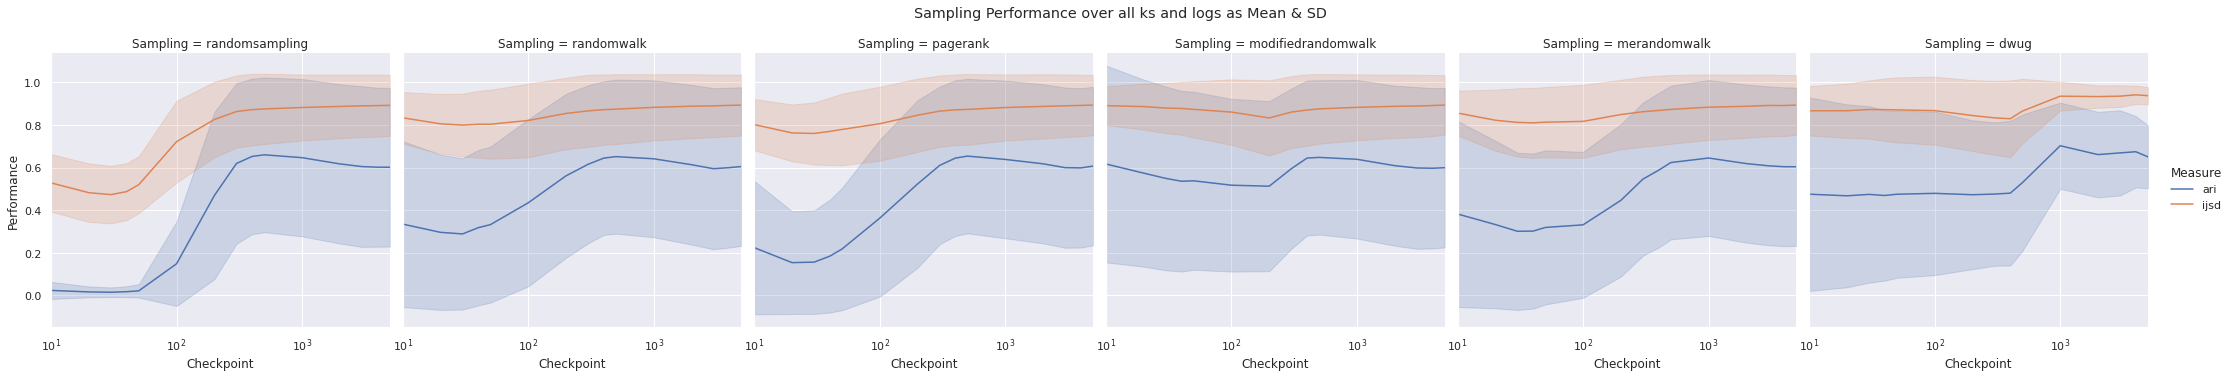

In [5]:
rp = sns.relplot(data=df_overview,
    x='Checkpoint', y='Performance', hue='Measure', col='Sampling', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.85)
rp.fig.suptitle('Sampling Performance over all ks and logs as Mean & SD')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

In [6]:
del(df_overview)

In [7]:
df_rs = df.query('Sampling == "randomsampling"')
df_rs = pd.melt(df_rs, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_rs.head()

Checkpoint  k  log Measure  Performance
0          20  3  0.1     ari     0.000526
1          50  3  0.5     ari     0.056703
2        2000  7  0.9     ari     0.116144
3        3000  7  0.9     ari     0.060674
4        4000  7  0.9     ari     0.030708

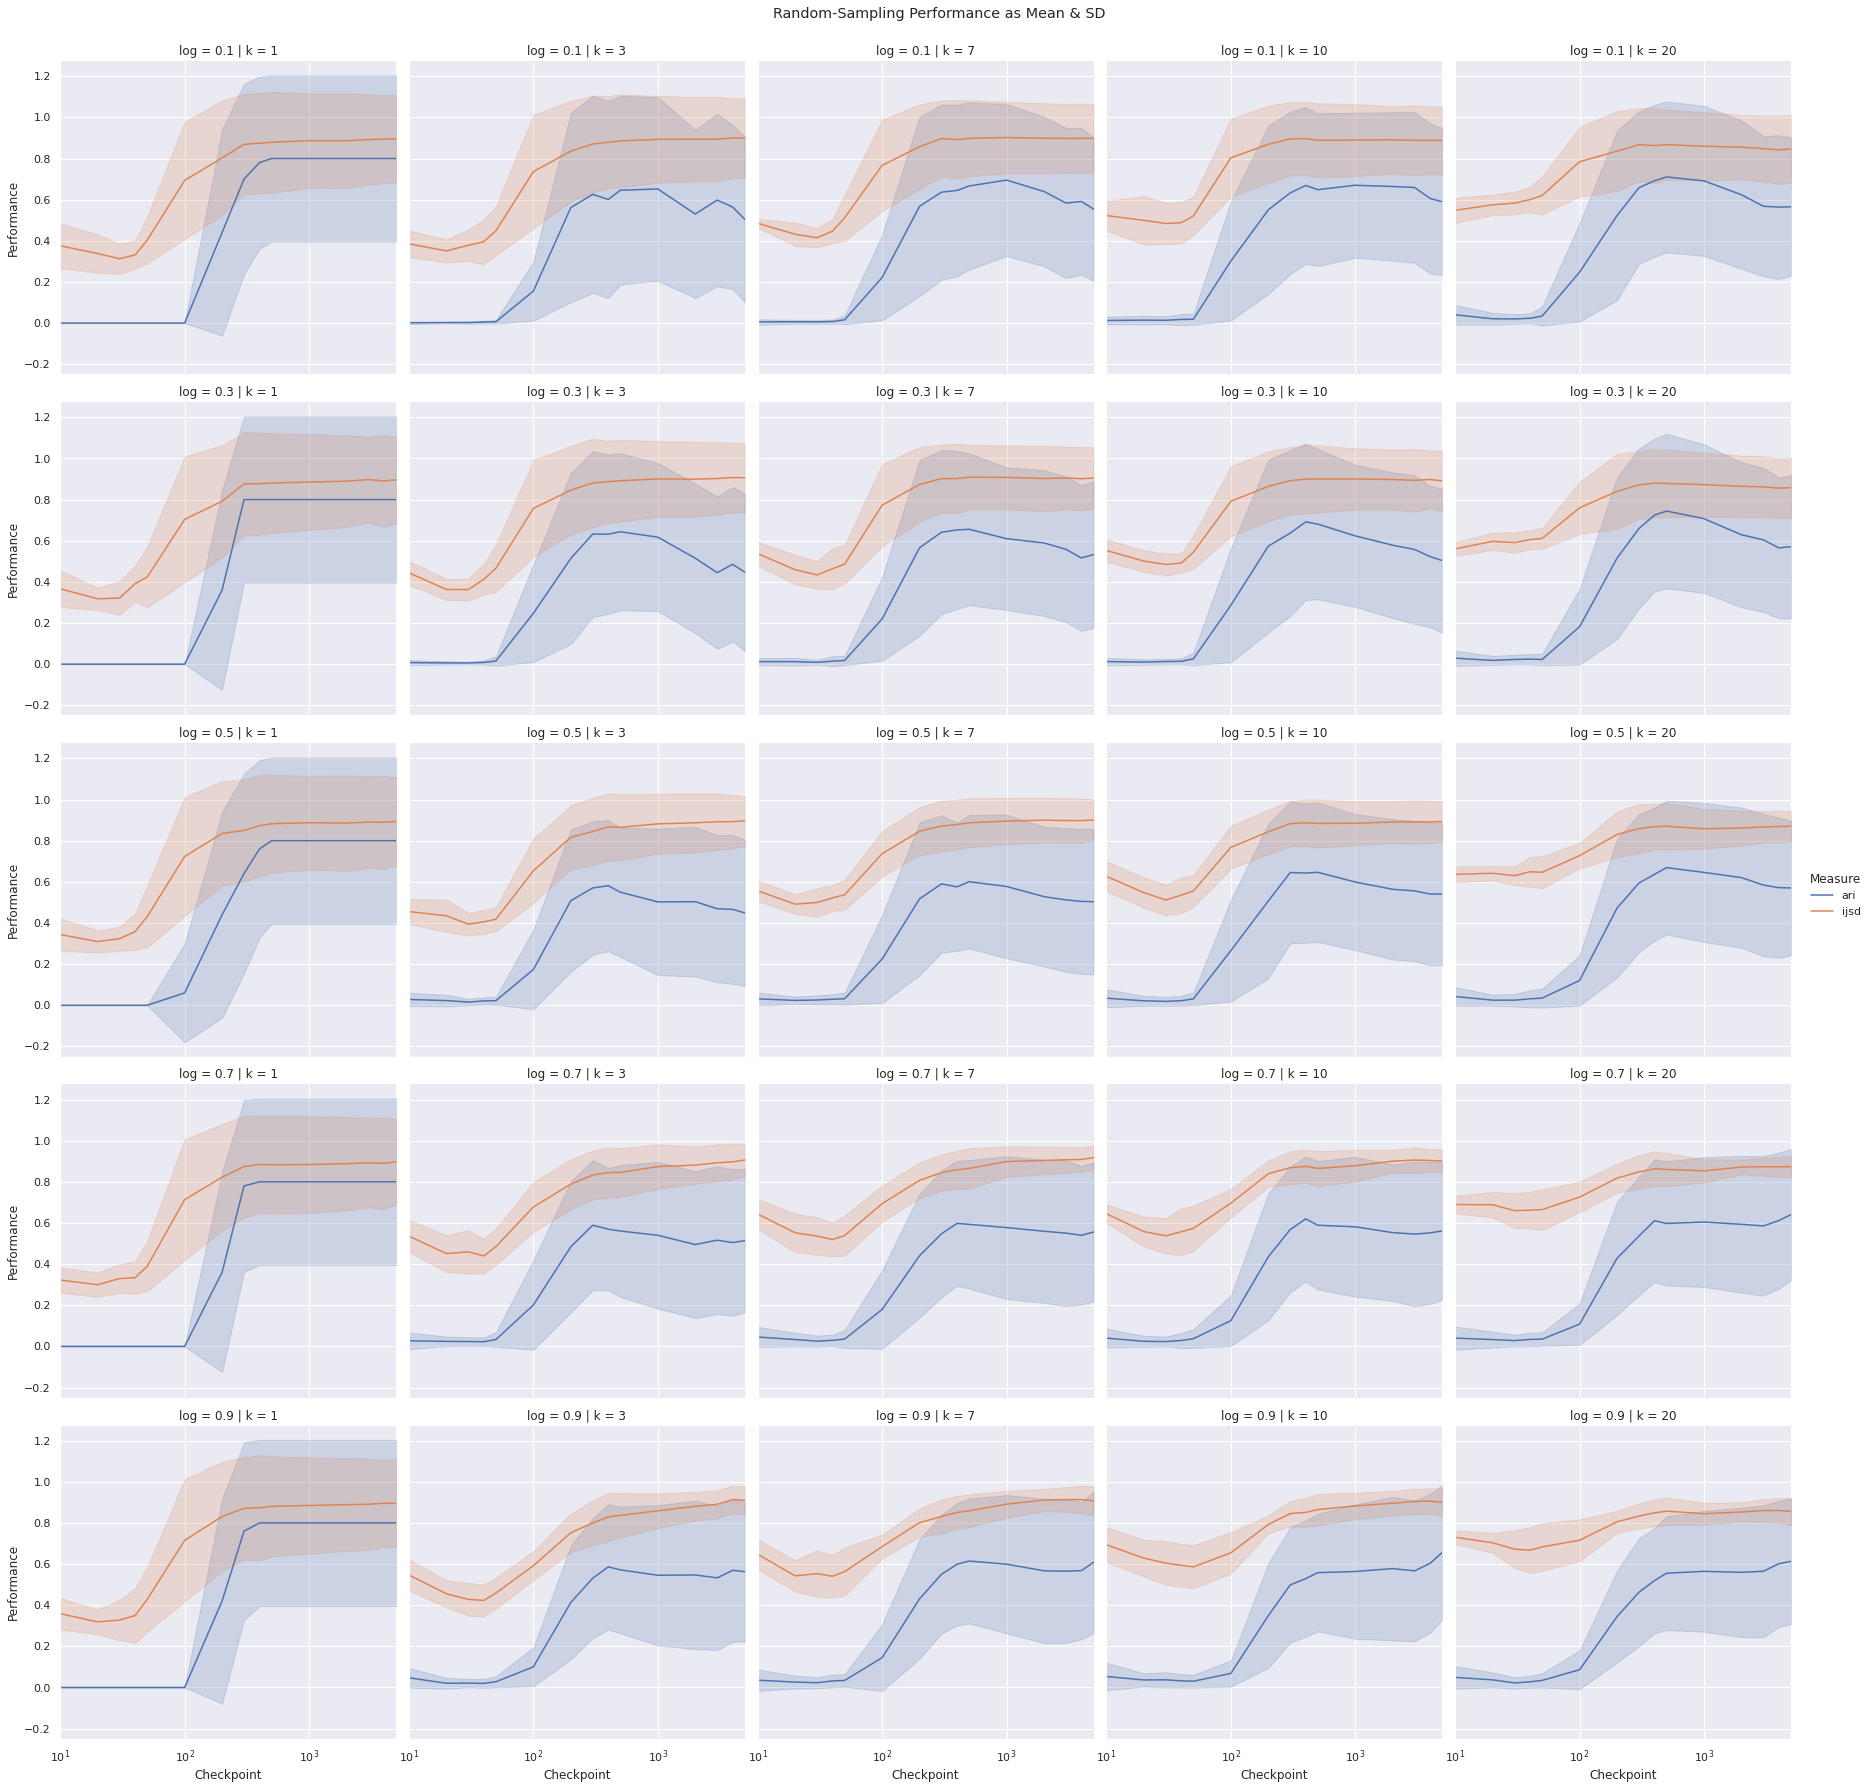

In [8]:
rp = sns.relplot(data=df_rs,
    x='Checkpoint', y='Performance', hue='Measure', col='k', row='log', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Random-Sampling Performance as Mean & SD')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

In [9]:
del(df_rs)

In [10]:
df_rw = df.query('Sampling == "randomwalk"')
df_rw = pd.melt(df_rw, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_rw.head()

Checkpoint   k  log Measure  Performance
0          50   7  0.1     ari     0.031886
1          40   3  0.7     ari     0.445327
2          10  20  0.9     ari    -0.139360
3          50   3  0.7     ari     0.373055
4         300   3  0.9     ari     0.064836

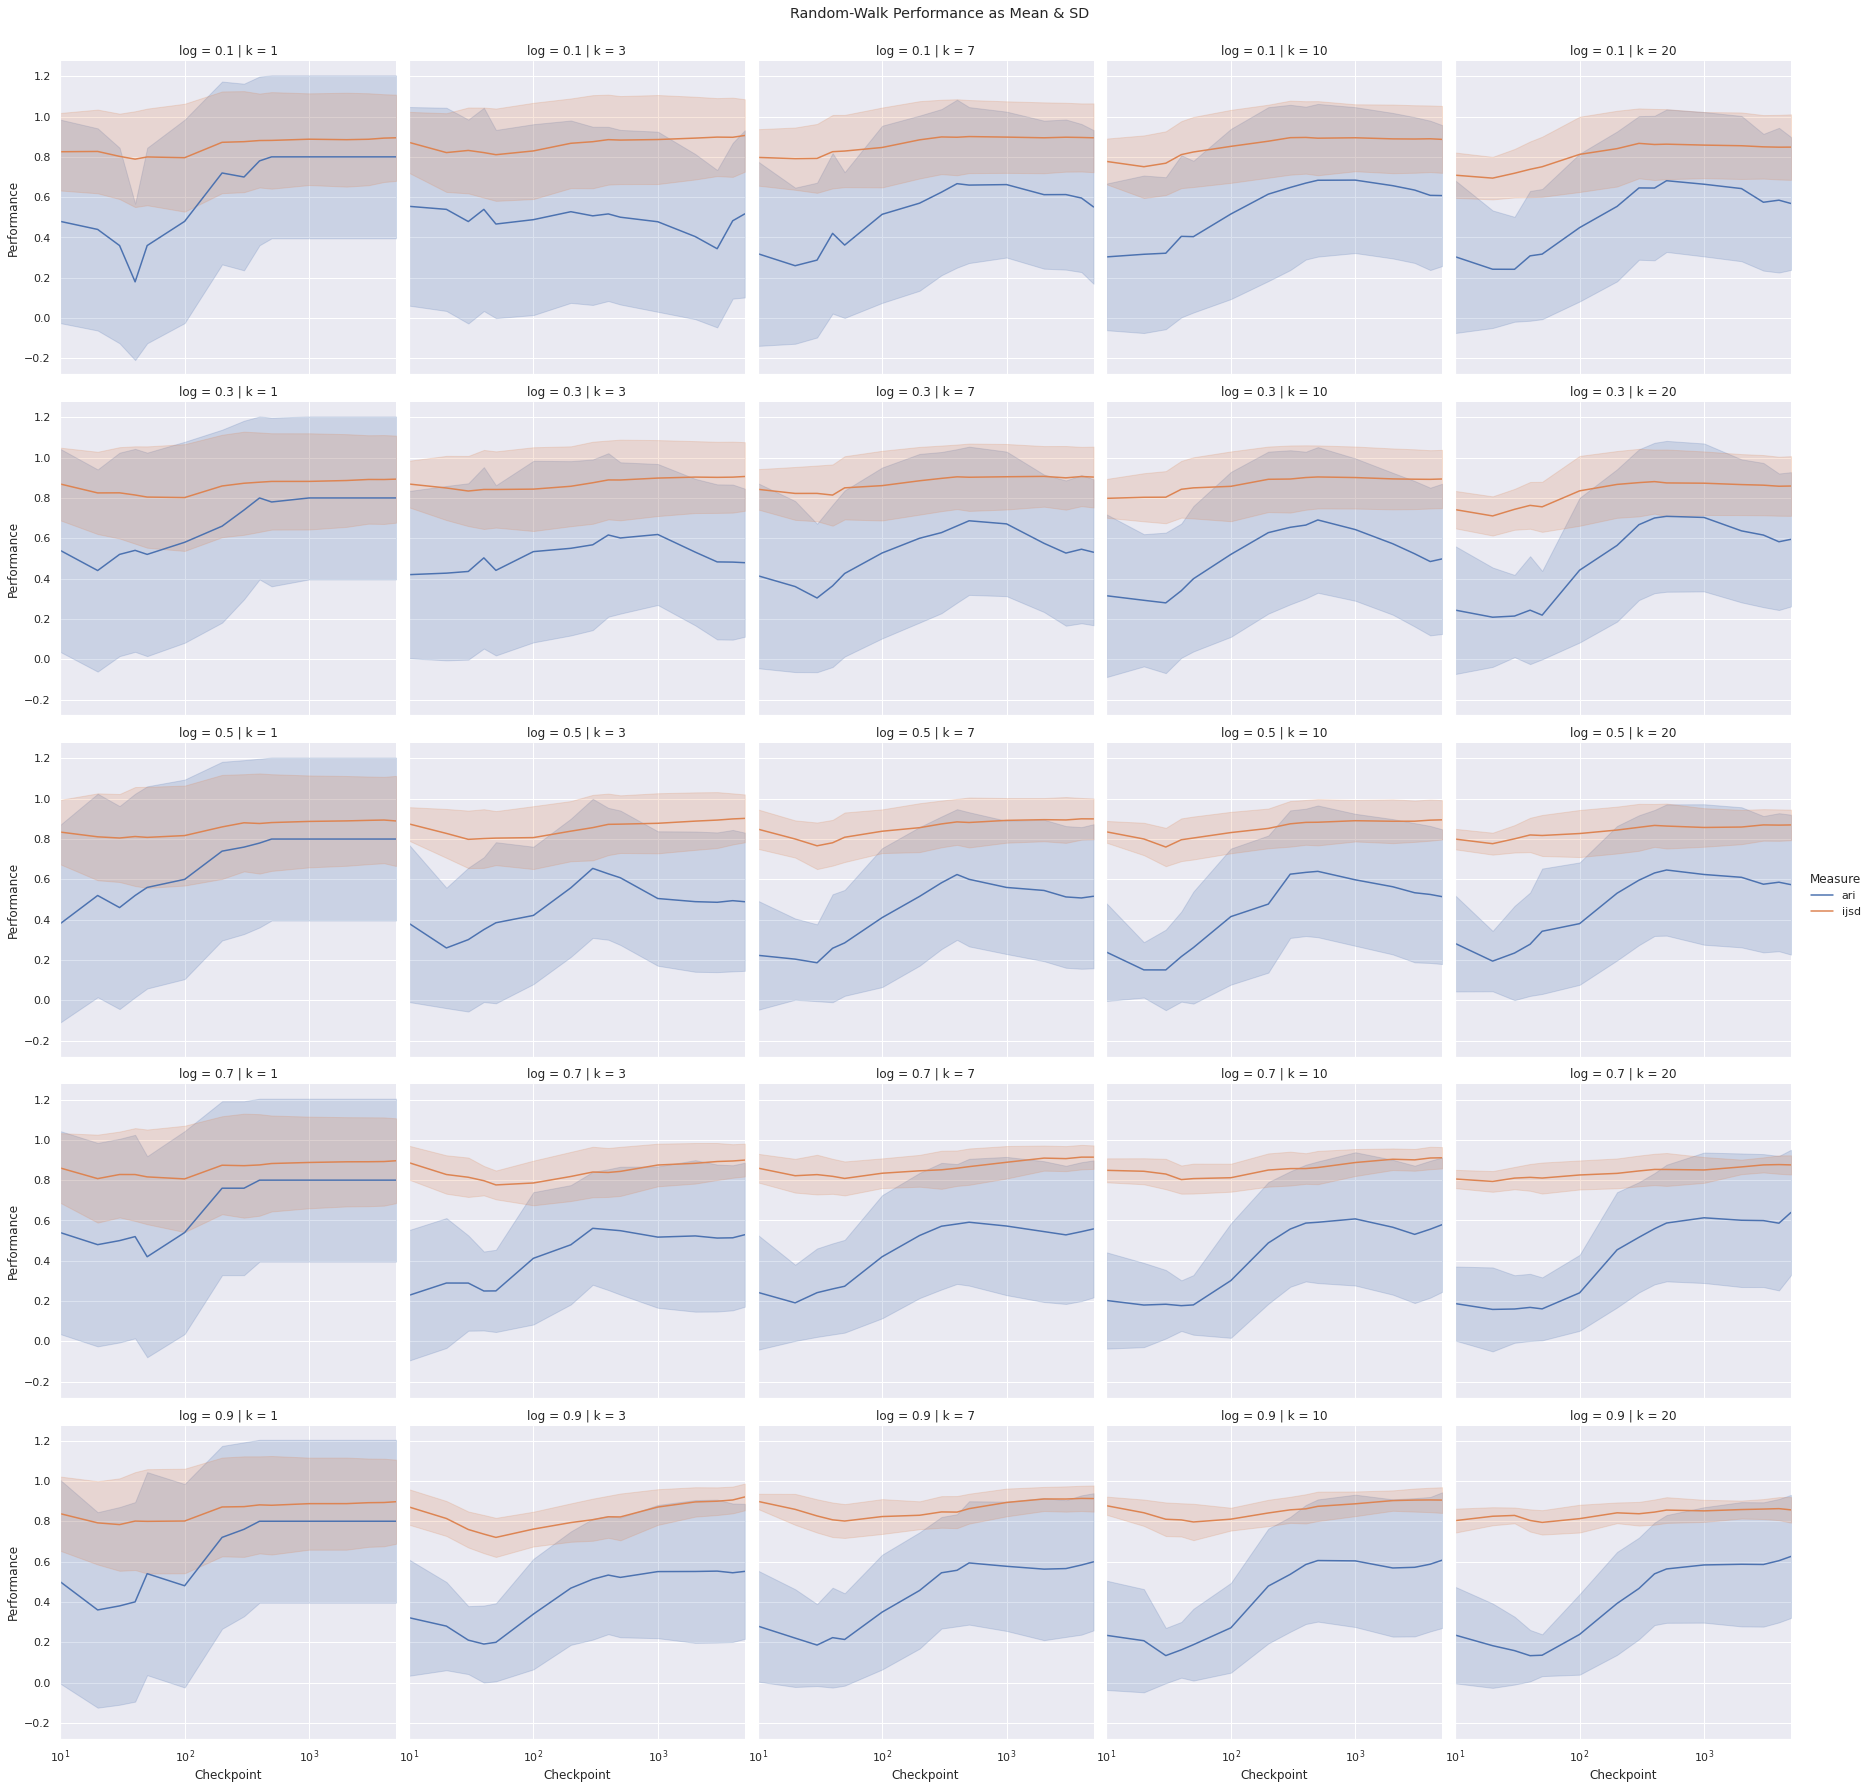

In [11]:
rp = sns.relplot(data=df_rw,
    x='Checkpoint', y='Performance', hue='Measure', col='k', row='log', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Random-Walk Performance as Mean & SD')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

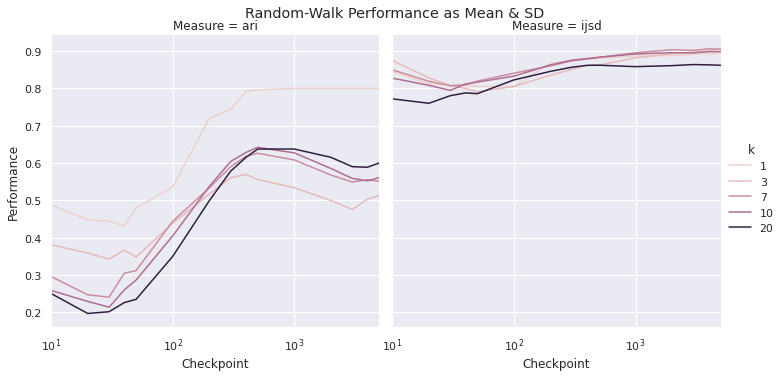

In [12]:
rp = sns.relplot(data=df_rw,
    x='Checkpoint', y='Performance', hue='k', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Random-Walk Performance as Mean & SD')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

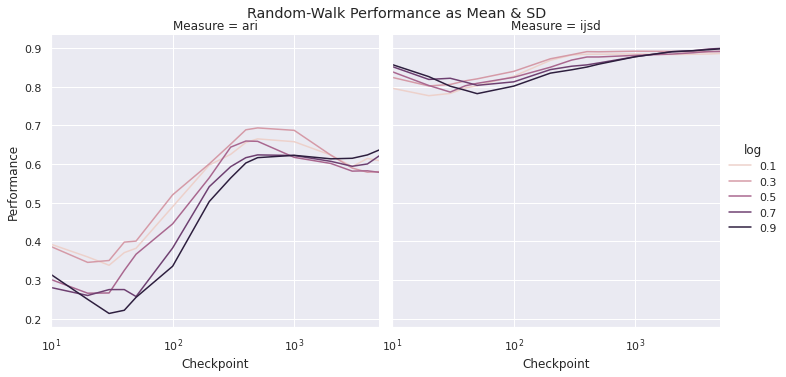

In [13]:
rp = sns.relplot(data=df_rw,
    x='Checkpoint', y='Performance', hue='log', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Random-Walk Performance as Mean & SD')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

In [14]:
df_rw = df.query('Sampling == "randomwalk" & k == 1')
df_rw.head()

Checkpoint  bootstrap_jsd  gambette  cluster_number  ijsd  ari    n  k  \
0           10            0.0  0.977848               1   1.0  1.0  100  1   
1           20            0.0  0.960816               1   1.0  1.0  100  1   
10        1000            0.0  1.000000               1   1.0  1.0  100  1   
9          500            0.0  0.866667               1   1.0  1.0  100  1   
6          200            0.0  0.059955               1   1.0  1.0  100  1   

    log    Sampling Clustering  
0   0.7  randomwalk        ccc  
1   0.7  randomwalk        ccc  
10  0.7  randomwalk        ccc  
9   0.7  randomwalk        ccc  
6   0.3  randomwalk         cw

In [15]:
df_rw = pd.melt(df_rw, id_vars=['Checkpoint'], value_vars=['cluster_number'], var_name='Measure', value_name='Cluster Number')
df_rw.head()

Checkpoint         Measure  Cluster Number
0          10  cluster_number               1
1          20  cluster_number               1
2        1000  cluster_number               1
3         500  cluster_number               1
4         200  cluster_number               1

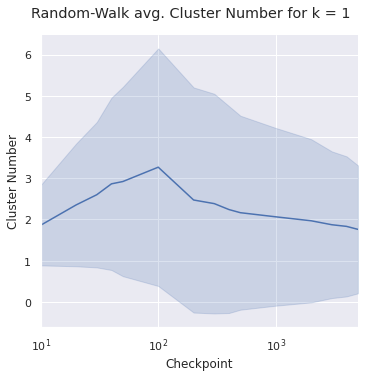

In [16]:
rp = sns.relplot(data=df_rw,
    x='Checkpoint', y='Cluster Number', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Random-Walk avg. Cluster Number for k = 1')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

In [17]:
del(df_rw)

In [18]:
df_pr = df.query('Sampling == "pagerank"')
df_pr = pd.melt(df_pr, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_pr.head()

Checkpoint   k  log Measure  Performance
0        3000   7  0.1     ari     0.645620
1        1000   7  0.1     ari     0.476651
2        5000  20  0.1     ari     0.845545
3        4000   7  0.3     ari     0.851691
4          30  10  0.9     ari    -0.005946

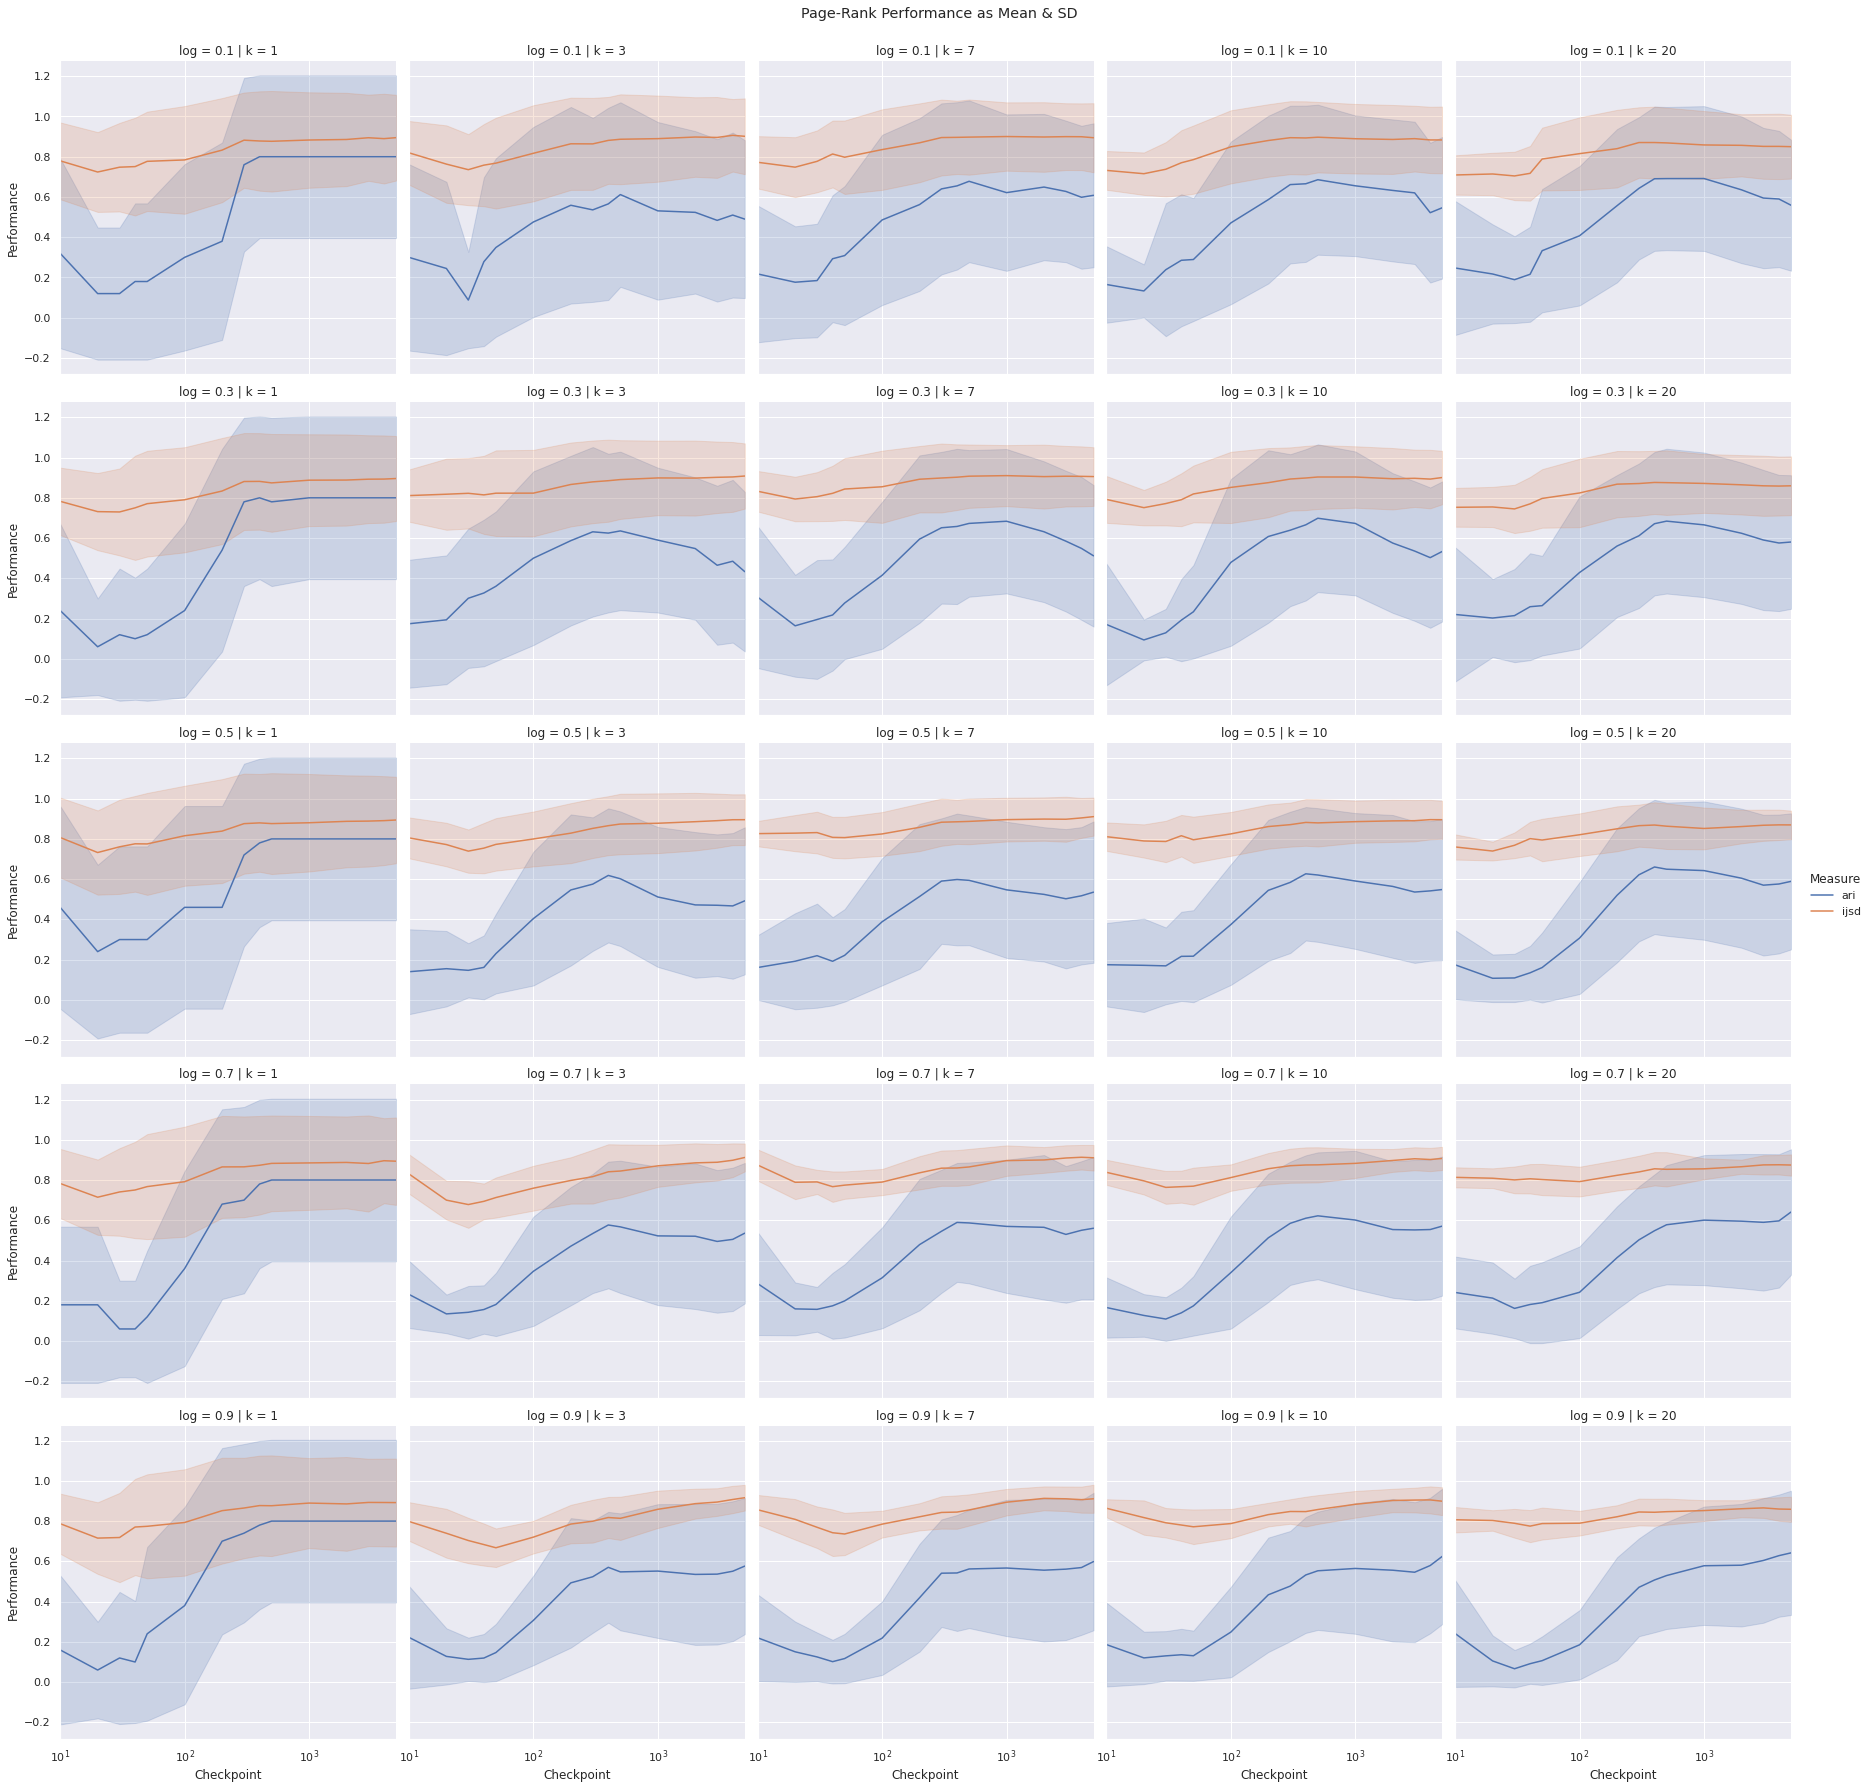

In [19]:
rp = sns.relplot(data=df_pr,
    x='Checkpoint', y='Performance', hue='Measure', col='k', row='log', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.95)
rp.fig.suptitle('Page-Rank Performance as Mean & SD')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

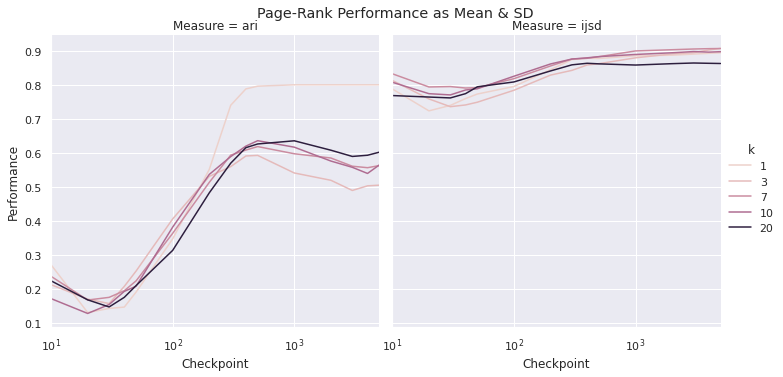

In [20]:
rp = sns.relplot(data=df_pr,
    x='Checkpoint', y='Performance', hue='k', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Page-Rank Performance as Mean & SD')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

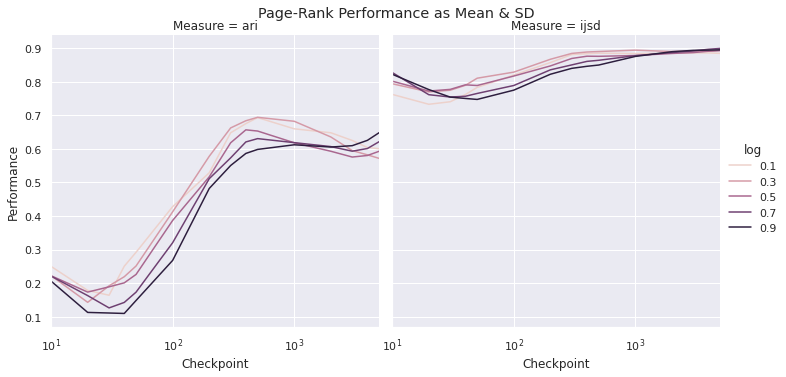

In [21]:
rp = sns.relplot(data=df_pr,
    x='Checkpoint', y='Performance', hue='log', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Page-Rank Performance as Mean & SD')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

In [22]:
del(df_pr)

In [23]:
df_mrw = df.query('Sampling == "modifiedrandomwalk"')
# df_pr = pd.melt(df_pr, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_mrw.head()

Checkpoint  bootstrap_jsd  gambette  cluster_number      ijsd       ari  \
14        5000       0.023265  0.152772               4  0.962087  0.797031   
13        4000       0.042836  0.128335               7  0.929847  0.698657   
12        3000       0.057504  0.128734               7  0.912648  0.702259   
0           10       0.032090  0.994415               5  0.744293  0.193548   
3           40       0.000000  0.975040               1  1.000000  1.000000   

      n   k  log            Sampling  Clustering  
14  100   3  0.7  modifiedrandomwalk  cc_nosplit  
13  100   3  0.7  modifiedrandomwalk  cc_nosplit  
12  100   3  0.7  modifiedrandomwalk  cc_nosplit  
0   100  10  0.5  modifiedrandomwalk    cc_split  
3   100   1  0.9  modifiedrandomwalk    cc_split

In [24]:
df_mrw_k = pd.melt(df_mrw, id_vars=['Checkpoint', 'k'], value_vars=['cluster_number'], var_name='Measure', value_name='Cluster Number')
df_mrw_k.head()

Checkpoint   k         Measure  Cluster Number
0        5000   3  cluster_number               4
1        4000   3  cluster_number               7
2        3000   3  cluster_number               7
3          10  10  cluster_number               5
4          40   1  cluster_number               1

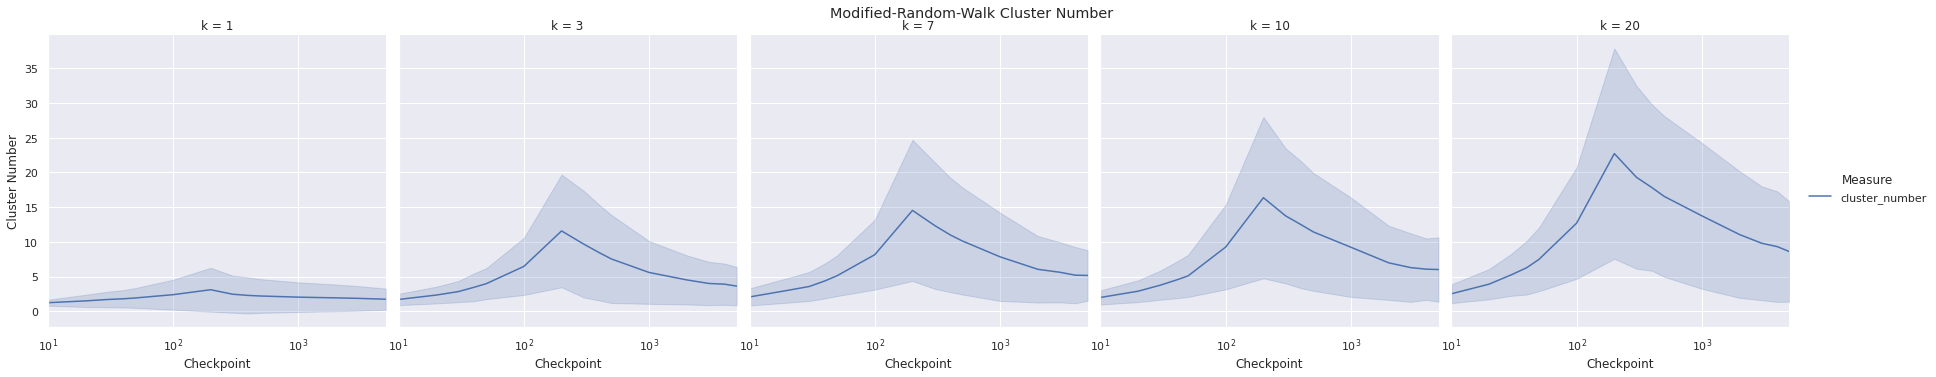

In [25]:
rp = sns.relplot(data=df_mrw_k,
    x='Checkpoint', y='Cluster Number', hue='Measure', col='k', ci='sd', kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Modified-Random-Walk Cluster Number')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])

In [26]:
del(df_mrw_k)

In [27]:
df_mrw = pd.melt(df_mrw, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_mrw.head()

Checkpoint   k  log Measure  Performance
0        5000   3  0.7     ari     0.797031
1        4000   3  0.7     ari     0.698657
2        3000   3  0.7     ari     0.702259
3          10  10  0.5     ari     0.193548
4          40   1  0.9     ari     1.000000

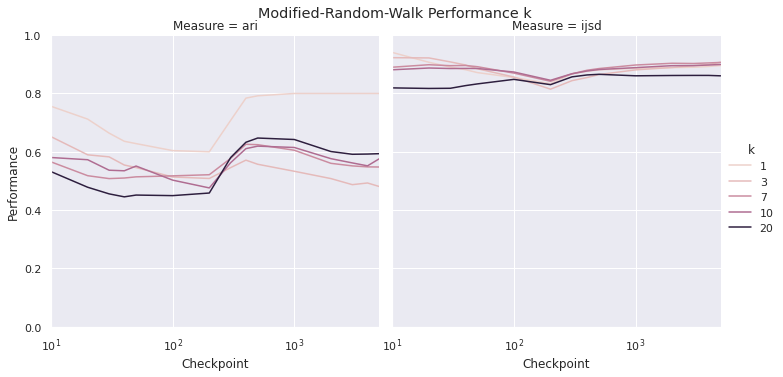

In [28]:
rp = sns.relplot(data=df_mrw,
    x='Checkpoint', y='Performance', hue='k', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Modified-Random-Walk Performance k')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

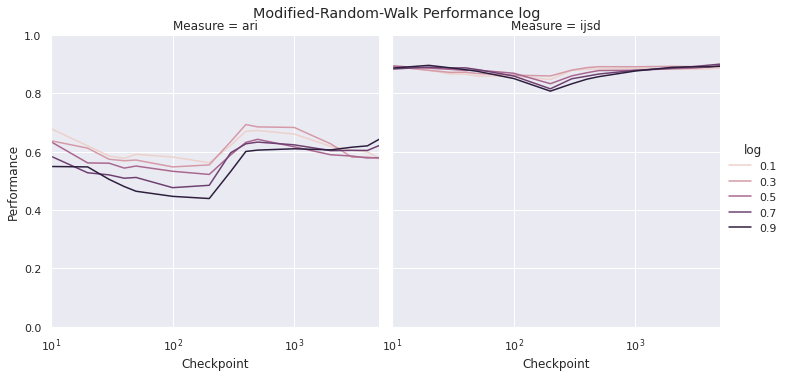

In [29]:
rp = sns.relplot(data=df_mrw,
    x='Checkpoint', y='Performance', hue='log', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Modified-Random-Walk Performance log')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

In [30]:
del(df_mrw)

In [31]:
df_merw = df.query('Sampling == "merandomwalk"')
# df_pr = pd.melt(df_pr, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_merw.head()

Checkpoint  bootstrap_jsd  gambette  cluster_number      ijsd       ari  \
2           30       0.018091  0.916932               2  0.981909  0.000000   
9          500       0.020529  0.037279               3  0.855871  0.884593   
13        4000       0.039666  0.521552               5  0.886306  0.983387   
2           30       0.054681  0.936721               7  0.973472  0.914461   
0           10       0.000000  0.984439               1  0.953470  1.000000   

      n   k  log      Sampling  Clustering  
2   100   1  0.1  merandomwalk    cc_split  
9   100  20  0.1  merandomwalk          cw  
13  100  20  0.1  merandomwalk          cw  
2   100   7  0.9  merandomwalk    cc_split  
0   100  10  0.1  merandomwalk  cc_nosplit

In [32]:
df_merw = pd.melt(df_merw, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_merw.head()

Checkpoint   k  log Measure  Performance
0          30   1  0.1     ari     0.000000
1         500  20  0.1     ari     0.884593
2        4000  20  0.1     ari     0.983387
3          30   7  0.9     ari     0.914461
4          10  10  0.1     ari     1.000000

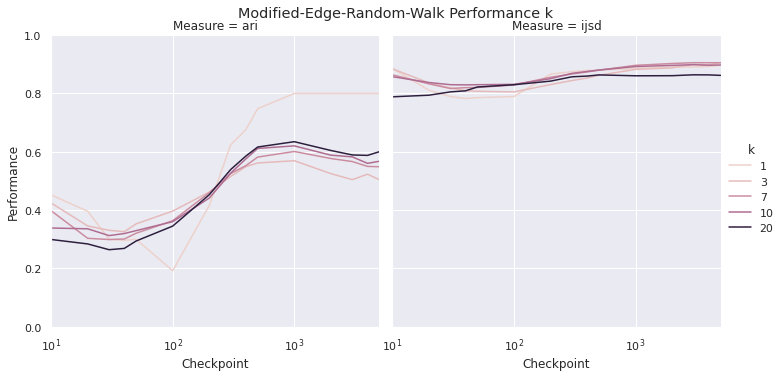

In [34]:
rp = sns.relplot(data=df_merw,
    x='Checkpoint', y='Performance', hue='k', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Modified-Edge-Random-Walk Performance k')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

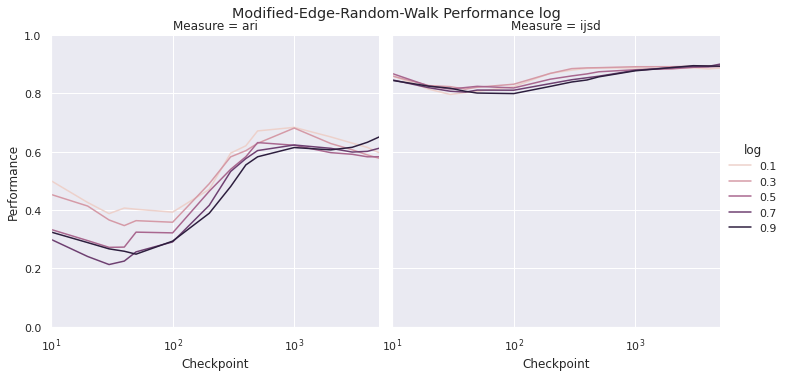

In [35]:
rp = sns.relplot(data=df_merw,
    x='Checkpoint', y='Performance', hue='log', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('Modified-Edge-Random-Walk Performance log')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

In [36]:
del(df_merw)

In [37]:
df_dwug = df.query('Sampling == "dwug"')
# df_pr = pd.melt(df_pr, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_dwug.head()

Checkpoint  bootstrap_jsd  gambette  cluster_number      ijsd       ari  \
10        1000       0.121786 -0.009089              22  0.987289  0.871081   
4           50       0.009322  0.546664               2  0.990678  0.000000   
3           40       0.063333  0.906163               8  0.815617  0.196549   
3           40       0.077190  0.825130              12  0.936548  0.939835   
11        2000       0.183979 -0.014922              36  0.865980  0.618939   

      n   k  log Sampling Clustering  
10  100  20  0.7     dwug   cc_split  
4   100   1  0.1     dwug        ccc  
3   100   7  0.7     dwug         cw  
3   100  20  0.7     dwug   cc_split  
11  100  20  0.7     dwug   cc_split

In [38]:
df_dwug_m = pd.melt(df_dwug, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_dwug_m.head()

Checkpoint   k  log Measure  Performance
0        1000  20  0.7     ari     0.871081
1          50   1  0.1     ari     0.000000
2          40   7  0.7     ari     0.196549
3          40  20  0.7     ari     0.939835
4        2000  20  0.7     ari     0.618939

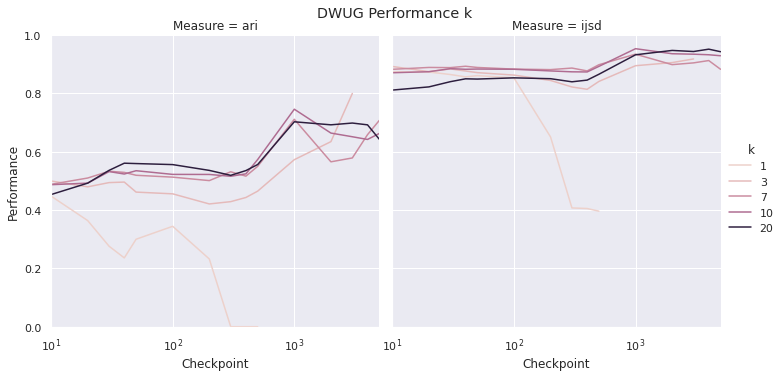

In [40]:
rp = sns.relplot(data=df_dwug_m,
    x='Checkpoint', y='Performance', hue='k', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('DWUG Performance k')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

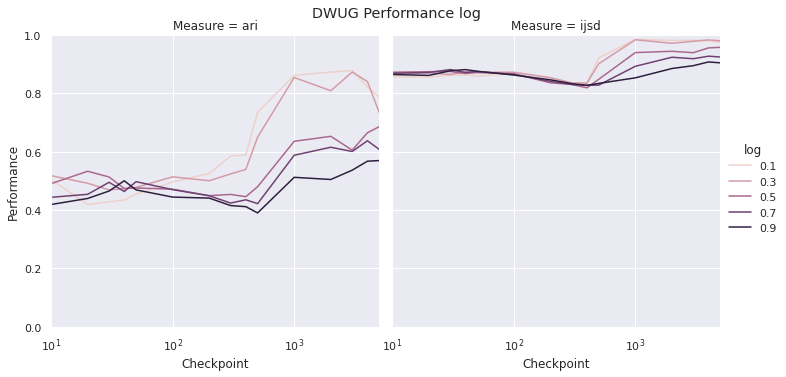

In [42]:
rp = sns.relplot(data=df_dwug_m,
    x='Checkpoint', y='Performance', hue='log', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('DWUG Performance log')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

In [43]:
df_dwug = df.query('Sampling == "dwug" & Clustering != "lm"')
df_dwug_m = pd.melt(df_dwug, id_vars=['Checkpoint', 'k', 'log'], value_vars=['ari', 'ijsd'], var_name='Measure', value_name='Performance')
df_dwug_m.head()

Checkpoint   k  log Measure  Performance
0        1000  20  0.7     ari     0.871081
1          50   1  0.1     ari     0.000000
2          40   7  0.7     ari     0.196549
3          40  20  0.7     ari     0.939835
4        2000  20  0.7     ari     0.618939

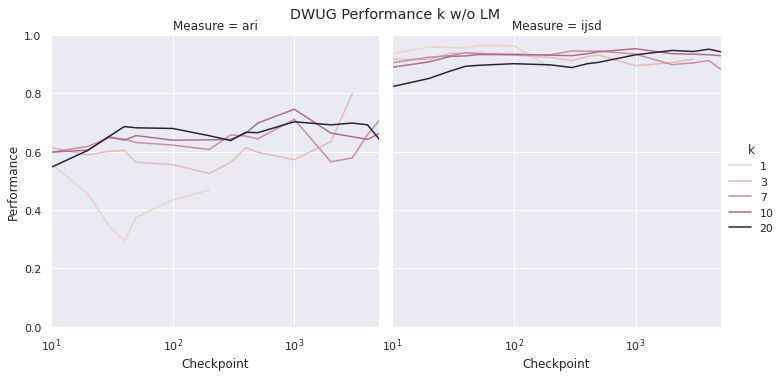

In [46]:
rp = sns.relplot(data=df_dwug_m,
    x='Checkpoint', y='Performance', hue='k', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('DWUG Performance k w/o LM')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])

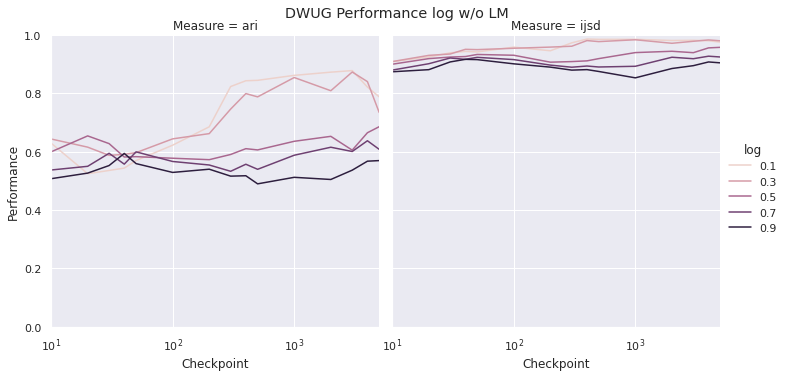

In [47]:
rp = sns.relplot(data=df_dwug_m,
    x='Checkpoint', y='Performance', hue='log', col='Measure', ci=None, kind='line')

rp.fig.subplots_adjust(top=0.9)
rp.fig.suptitle('DWUG Performance log w/o LM')
rp.set(xscale='log')
rp.set(xlim=[10, 5000])
rp.set(ylim=[0.0, 1.0])